In [130]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import scipy.stats as sts
import requests
import time
from scipy.stats import linregress
import gmaps
from config import api_key


SyntaxError: invalid syntax (<ipython-input-130-4284ffa895b4>, line 10)

In [98]:
populationcsv = "../UGB/top_100clean.csv"
population = pd.read_csv(populationcsv)
population = population.rename(columns = {"Persons by km2": "Persons per km2", "2010 Census": "Census Population"})
population.set_index('City', inplace=True)
population

,Rank,Census Population,State,Persons per km2,Latitude,Longitude
City,,,,,,
New York City,1,8175133,NY,13401.8,40.6943,-73.9249
Los Angeles,2,3792621,CA,3295.0,34.1139,-118.4068
Chicago,3,2695598,IL,4612.0,41.8373,-87.6862
Houston,4,2099451,TX,1401.0,29.7869,-95.3905
Phoenix,5,1445632,AZ,1212.0,33.5722,-112.0891
...,...,...,...,...,...,...
Fremont,96,214089,CA,1171.0,37.5265,-121.9852
Boise City,97,205671,ID,1045.0,43.6007,-116.2312
Richmond,98,204214,VA,1463.0,37.5295,-77.4756


In [99]:
ugb_cities = "../UGB/ugb_cities.csv"
ugb_df = pd.read_csv(ugb_cities)
ugb_df = ugb_df.rename(columns = {"Persons per km": "Persons per km2", "Population": "Census Population"})
ugb_df.set_index('City', inplace=True)
ugb_df.head()

,Census Population,State,Persons per km2,Latitude,Longitude
City,,,,,
Lexington,295803,KY,438,38.0423,-84.4587
Seattle,608660,WA,3336,47.6211,-122.3244
St. Paul,285068,MN,2277,44.9477,-93.1040
Minneapolis,382578,MN,3019,44.9635,-93.2678
Virginia Beach,437994,VA,710,36.7335,-76.0435


In [100]:
density = population["Persons per km2"]
ugb_density = ugb_df["Persons per km2"]

In [101]:
ugb_density_mean = ugb_density.mean()
ugb_density_mean

2346.0

In [102]:
cities_density_mean = density.mean()
cities_density_mean

1915.4879999999998

In [103]:
max_dens = density.max()
max_dens

13401.8

In [104]:
gmaps.configure(api_key=api_key)

In [107]:
#change data types to float
locations = population[["Latitude", "Longitude"]].astype(float)
ugb_locations =ugb_df[["Latitude", "Longitude"]].astype(float)
density= population["Persons per km2"].astype(float)
ugb_density = ugb_df["Persons per km2"].astype(float)

In [121]:
#heatmap layer
fig = gmaps.figure()

heat_layer = gmaps.heatmap_layer(locations, weights=density, 
                                 dissipating=False, max_intensity=5000,
                                 point_radius = 1)

fig.add_layer(heat_layer)


In [122]:
#add ugb markers
ugb_layer = gmaps.symbol_layer(
    ugb_locations, fill_color='rgba(0, 150, 0, 0.4)',
    stroke_color='rgba(0, 0, 150, 0.4)', scale=4)
    
fig = gmaps.figure()
fig.add_layer(ugb_layer)


In [132]:
fig = gmaps.figure()
fig.add_layer(heat_layer)
fig.add_layer(ugb_layer)

fig


Figure(layout=FigureLayout(height='420px'))

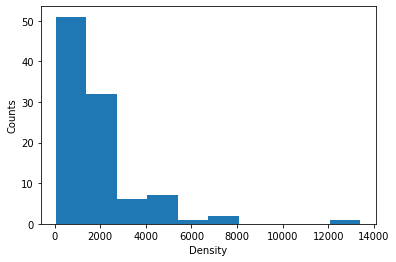

NormaltestResult(statistic=104.02258871599516, pvalue=2.5809635052509584e-23)


In [116]:
plt.hist(density)
plt.xlabel('Density')
plt.ylabel('Counts')
plt.show()
print(sts.normaltest(density.sample(100)))

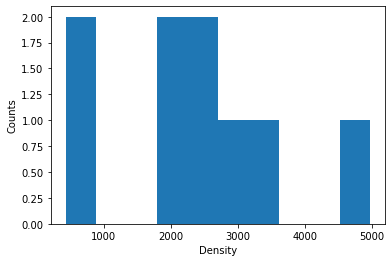

NormaltestResult(statistic=0.565848397053911, pvalue=0.7535769079344707)


/Users/Julia/opt/anaconda3/envs/PythonData/lib/python3.6/site-packages/scipy/stats/stats.py:1450: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=8
  "anyway, n=%i" % int(n))


In [117]:
plt.hist(ugb_density)
plt.xlabel('Density')
plt.ylabel('Counts')
plt.show()
print(sts.normaltest(ugb_density.sample(8)))

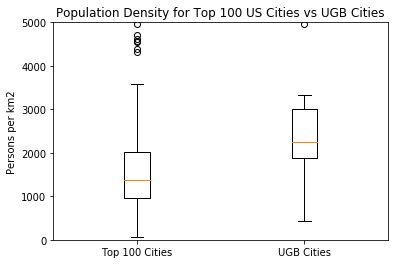

<Figure size 432x288 with 0 Axes>

In [126]:
data = [density, ugb_density]
fig1, ax1 = plt.subplots()
ax1.set_title('Population Density for Top 100 US Cities vs UGB Cities')
ax1.set_ylabel('Persons per km2')
ax1.boxplot(data)
ax1.set_xticklabels(['Top 100 Cities', 'UGB Cities'])
top = 5000
bottom = 0
ax1.set_ylim(bottom, top)
plt.show()
plt.savefig("../UGB/PopD_boxplot.png")
plt.show()

In [119]:
quartiles = density.quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq

print(f"The lower quartile of population density is: {lowerq}")
print(f"The upper quartile of population density is: {upperq}")
print(f"The interquartile range of population density is: {iqr}")
print(f"The the median of population density is: {quartiles[0.5]} ")

lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)
print(f"Values below {lower_bound} could be outliers.")
print(f"Values above {upper_bound} could be outliers.")

The lower quartile of population density is: 951.5
The upper quartile of population density is: 2011.0
The interquartile range of population density is: 1059.5
The the median of population density is: 1386.0 
Values below -637.75 could be outliers.
Values above 3600.25 could be outliers.


In [120]:
quartiles = ugb_density.quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq

print(f"The lower quartile of UGB population density is: {lowerq}")
print(f"The upper quartile of UGB population density is: {upperq}")
print(f"The interquartile range of UGB population density is: {iqr}")
print(f"The the median of UGB population density is: {quartiles[0.5]} ")

lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)
print(f"Values below {lower_bound} could be outliers.")
print(f"Values above {upper_bound} could be outliers.")

The lower quartile of UGB population density is: 1874.0
The upper quartile of UGB population density is: 3019.0
The interquartile range of UGB population density is: 1145.0
The the median of UGB population density is: 2257.0 
Values below 156.5 could be outliers.
Values above 4736.5 could be outliers.
